In [59]:
import copy, csv
%matplotlib inline
import pandas, matplotlib

def median(nums):
    nums = copy.copy(nums)
    nums.sort()
    if len(nums) % 2 == 1:
        return nums[len(nums) // 2]
    else:
        v1 = nums[len(nums) // 2]
        v2 = nums[len(nums) // 2 - 1]
        return (v1+v2) / 2

In [62]:
# loads a file that can be used to lookup names from IDs
def get_mapping(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    file_data = dict(file_reader)
    file.close()
    return file_data

In [61]:
# small mapping of IDs to People or Movies
mapping = get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [63]:
# find value connected to ID nm0752751
for i in mapping:
    if i == 'nm0752751':
        val = mapping[i]
val

'Mitchell Ryan'

In [64]:
# find all values containing nm in their ID
nm = []
for i in mapping:
    if i[0:2] == 'nm':
        nm.append(mapping[i])
nm

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [65]:
# find IDs of people named Gary
gary = []
for i in mapping:
    lower_names = mapping[i].lower().split(' ')
    if lower_names[0] == 'gary':
        gary.append(i)
gary

['nm0000997', 'nm0001219']

In [68]:
# opens csv file, organizes data into list of dicts
def get_raw_movies(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    file_data = list(file_reader)
    file.close()
    header = file_data[0]
    file_data = file_data[1:]
    movies = []
    for i in range(len(file_data)):
        movie_data = {}
        movie_data['title'] = file_data[i][header.index('title')]
        movie_data['year'] = int(file_data[i][header.index('year')])
        movie_data['rating'] = float(file_data[i][header.index('rating')])
        movie_data['directors'] = file_data[i][header.index('directors')].split(',')
        movie_data['actors'] = file_data[i][header.index('actors')].split(',')
        movie_data['genres'] = file_data[i][header.index('genres')].split(',')
        movies.append(movie_data)
    return movies

In [67]:
# list of dicts of movies in small_movies.csv
raw_movie = get_raw_movies('small_movies.csv')
raw_movie

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [69]:
# number of genres for the first movie in small movies
len(raw_movie[0].get('genres'))

3

In [70]:
# actors that appear in the second movie in small movies
actors_idxone = raw_movie[1].get('actors')
actors_idxone[-1]

'nm0752751'

In [71]:
# connects movies in csv file to their mappings
def get_movies(movies_path, mapping_path):
    movie_data = get_raw_movies(movies_path)
    mapping_data = get_mapping(mapping_path)
    for movie in movie_data:
        for key in movie:
            for mapping in mapping_data:
                if type(movie[key]) == list:
                    for name in movie[key]:
                        idx = movie[key].index(name)
                        if name == mapping:
                            movie[key][idx] = mapping_data[mapping]
                if type(movie[key]) == str:
                    if movie[key] == mapping:
                        movie[key] = mapping_data[mapping]
    return movie_data

In [72]:
# full data for small movies
small = get_movies('small_movies.csv', 'small_mapping.csv')

In [73]:
# title of the first movie in small movies
small[0]["title"]

'Runaway Jury'

In [74]:
# actors featured in the second movie in small movies
small[1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [75]:
# directors for the last movie in small movies
small[-1]["directors"]

['Richard Donner']

In [76]:
# list of dicts containing the information for the movies in small movies
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [77]:
# list of dicts containing information for the movies in the full movie list
movies = get_movies("movies.csv", "mapping.csv")
# deep copy of movies list
movies_copy = copy.deepcopy(movies)

In [78]:
# first three movies in movies
movies[:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [79]:
# last three movies in movies
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [80]:
# returns a list of movies made in a certain year
def filter_movies_by_year(movies, year):
    movies = copy.deepcopy(movies)
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [81]:
# movies made in 1931
filter_movies_by_year(movies, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [82]:
# movies made in 1932
filter_movies_by_year(movies, 1932)

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [83]:
# returns the number of unique datapoints
def unique(dataset, datapoint):
    u = []
    for movie in dataset:
        for key in movie:
            if key == datapoint:
                for i in movie[key]:
                    if i not in u:
                        u.append(i)
    return len(u)

In [84]:
# number of unique genres in movies
unique(movies, 'genres')

18

In [85]:
# number of unique directors in movies
unique(movies, 'directors')

1247

In [86]:
# movie with the most number of actors
most_actors = None
for movie in movies:
    for key in movie:
        if key == 'actors':
            if most_actors is None or len(movie[key]) > len(most_actors):
                most_actors = movie['actors']
for movie in movies:
    for key in movie:
        if movie['actors'] == most_actors:
            most = movie['title']
most

'Shoulder Arms'

In [87]:
# average rating for movies in movie
total = 0
for movie in movies:
    for key in movie:
        if key == 'rating':
            total += movie[key]
denominator = len(movies)
avg = total/denominator
avg

6.401659528907912

In [88]:
# longest title in movies based on number of characters
movie_titles = []
for movie in movies:
    for key in movie:
        if key == 'title':
            movie_titles.append(movie[key])
longest = max(movie_titles, key=len)
longest

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [89]:
# bucketizes movies based on a given key
def bucketize(movie_list, movie_key):
    movie_values = {}
    for movie in movie_list:
        for key in movie:
            if key == movie_key and type(movie[movie_key]) != list:
                if movie[key] not in movie_values:
                    movie_values[movie[key]] = []
                movie_values[movie[key]].append(movie)
            elif key == movie_key and type(movie[movie_key]) == list:
                for genre in movie[movie_key]:
                    if genre not in movie_values:
                        movie_values[genre] = []
                    movie_values[genre].append(movie)
                
    return movie_values

In [31]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [90]:
# bucketizing movies in test movies based on year
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [91]:
# bucketizing movies in test movies based on style
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [92]:
# bucketizing movies in test movies based on genres
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [93]:
# bucketizing movies in small movies based on genres
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [94]:
# number of unique actors that appear in small movies
len(bucketize(small, "actors"))

7

In [95]:
# number of unique actors that appear in movies
len(bucketize(movies, "actors"))

2605

In [96]:
# number of movies by genre
num_per_genre = {}
bucket = bucketize(movies, "genres")
for genre in bucket:
    num_per_genre[genre] = len(bucket[genre])
num_per_genre

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [97]:
# plots a bar graph of a dict
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

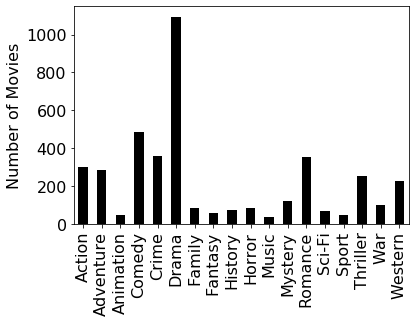

In [98]:
# graph of number of movies by genre
plot_dict(num_per_genre, 'Number of Movies')

In [99]:
# filter movies to only use movies made within the given timeframe
def filter_year(movie_list, beginning_year, end_year):
    if beginning_year == None:
        begin = 0
    else:
        begin = beginning_year
    if end_year == None:
        end = 2018
    else:
        end = end_year
    years = []
    bucket_year = bucketize(movie_list, 'year')
    for year in bucket_year:
        if begin <= year <= end:
            years.append(year)
    return years

In [100]:
# bucketize movies based on genre
bucket_genre = bucketize(movies, 'genres')

In [101]:
def bucket_counts(year_range, movie_key):
    bucket_genre = bucketize(movies, movie_key)
    buckets = {}
    for genre in bucket_genre:
        for movie in bucket_genre[genre]:
            for key in movie:
                if key == 'year' and movie['year'] in year_range:
                    if genre not in buckets:
                        buckets[genre] = []
                    buckets[genre].append(movie)
    for genre in buckets:
        buckets[genre] = len(buckets[genre])
    return buckets

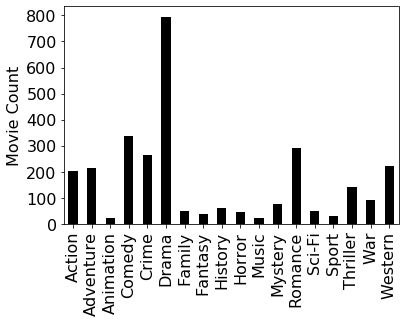

In [102]:
# number of movies by genre made prior to 2000
plot_dict(bucket_counts(filter_year(movies, None, 1999), "genres"), "Movie Count")

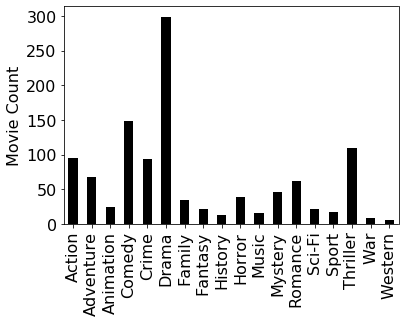

In [103]:
# number of movies by genre made in or after 2000
plot_dict(bucket_counts(filter_year(movies, 2000, None), "genres"), "Movie Count")

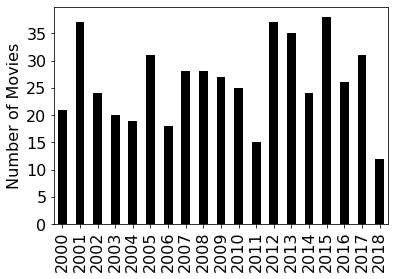

In [104]:
# number of movies made each year since 2000
bucket_year = bucketize(movies, 'year')
num_per_yr = {}
for year in bucket_year:
    if year in filter_year(movies, 2000, None):
        if year not in num_per_yr:
            num_per_yr[year] = []
        num_per_yr[year] = len(bucket_year[year])
plot_dict(num_per_yr, "Number of Movies")

In [105]:
# number of years directed for each director who has directed for at least 30 years
bucket_direct = bucketize(movies, 'directors')
director_years = {}
for director in bucket_direct:
    for movie in bucket_direct[director]:
        for key in movie:
            if key == 'year':
                if director not in director_years:
                    director_years[director] = []
                director_years[director].append(movie[key])
                
for director in director_years:
    start_yr = min(director_years[director])
    end_yr = max(director_years[director])
    direct_span = end_yr - start_yr
    director_years[director] = direct_span

over_thirty = {}
for director in director_years:
    if director_years[director] >= 30:
        over_thirty[director] = director_years[director]
over_thirty

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [106]:
# acting career spans of actors who have acted for at least 50 years
bucket_act = bucketize(movies, 'actors')
actor_years = {}
for actor in bucket_act:
    for movie in bucket_act[actor]:
        for key in movie:
            if key == 'year':
                if actor not in actor_years:
                    actor_years[actor] = []
                actor_years[actor].append(movie[key])
                
for actor in actor_years:
    start_yr = min(actor_years[actor])
    end_yr = max(actor_years[actor])
    act_span = end_yr - start_yr
    actor_years[actor] = act_span

over_fifty = {}
for actor in actor_years:
    if actor_years[actor] >= 50:
        over_fifty[actor] = actor_years[actor]
over_fifty

{'Kurt Russell': 50,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Glenn Ford': 52,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'George Burns': 60,
 'Dean Stockwell': 53}

In [107]:
def row_ranking(row):
    return row["span"]

# returns a list of dicts mapping people to career span
def top_n_span(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        span = buckets[name]
        rows.append({"name": name, "span": span})

    rows.sort(key=row_ranking, reverse=True)
    
    if len(rows) > n:
        diff = n - len(rows)
        rows = rows[:diff]
    return rows

In [108]:
# ten directors with the longest careers
top_n_span(over_thirty, 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [51]:
bucket_act = bucketize(movies, 'actors')
actor_years = {}
for actor in bucket_act:
    for movie in bucket_act[actor]:
        for key in movie:
            if key == 'year':
                if actor not in actor_years:
                    actor_years[actor] = []
                actor_years[actor].append(movie[key])
                
for actor in actor_years:
    start_yr = min(actor_years[actor])
    end_yr = max(actor_years[actor])
    act_span = end_yr - start_yr
    actor_years[actor] = act_span

actor_span = {}
for actor in actor_years:
    if actor_years[actor] >= 40:
        actor_span[actor] = actor_years[actor]


In [109]:
# ten actors with the longest careers
top_n_span(actor_span, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [53]:
def row_rank(row):
    return row['rating']
def highest_med_rating(bucket, n, minimum):
    
    val_median = {}
    for val in bucket:
        for movie in bucket[val]:
            for key in movie:
                if key == 'rating':
                    if val not in val_median:
                        val_median[val] = []
                    val_median[val].append(movie[key])
    vals = []
    for val in val_median:
        med = median(val_median[val])
        count = len(val_median[val])
        if minimum == None:
            vals.append({'category': val, 'rating': med, 'count': count})
        elif count >= minimum:
            vals.append({'category': val, 'rating': med, 'count': count})


    vals.sort(key=row_rank, reverse=True)

    if len(vals) > n:
            diff = n - len(vals)
            vals = vals[:diff]
    return vals

In [111]:
# three genres in which movies receive the highest median rating
highest_med_rating(bucket_genre, 3, None)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [110]:
# ten best years for movies based on median rating
highest_med_rating(bucket_year, 10, None)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [112]:
# five best years for movies in years that had at least 10 movies
highest_med_rating(bucket_year, 5, 10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [113]:
# four best directors with at least 3 movies
highest_med_rating(bucket_direct, 4, 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7}]

In [114]:
# three best actors with at least 5 movies
highest_med_rating(bucket_act, 3, 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]